**=====================================================**

# Machine Failure Analysis 
Noah MacGillivray | BIT-446 Assignment(T5) | Summer 2025 

Model Evaluation of a Naive Bayes Classification Model

**Environment:** Ubuntu, VS Code

**=====================================================**

## Introduction
This program imports machine failure data for three different models with (possible)
associated factors including hours run and average hours in-between maintenance. The 
data is prepared, splits for training and testing are made using both random and 
stratified k-folds, and the naive Bayes algorithm is applied to both. The results are 
then displayed for evaluation.   

## Required packages

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import os 
import matplotlib as plt 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import kds

## Data Import and Initial Exploration 
The machine failure data is read in, head/tail/summary are printed to
ensure proper import and view summary. The first 300 rows of the dataset have no 
missing values needed for naive Bayes evaluation, and the rest of the dataset was 
excluded.   

In [ ]:
# read first 100 rows
try: 
    failure_rate = pd.read_excel('BIT-446-RS-T4-T5-FailureRate.xlsx', nrows=300) 
    print(f"Successfully loaded {len(failure_rate)} rows\n") 
except Exception as e:
    print(f"Failed to load Excel file: {e}")

# print head
print("\n", failure_rate.head())

# print tail
print("\n", failure_rate.tail())

# display df info
failure_rate.info()

Successfully loaded 300 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   record                   300 non-null    int64
 1   hours_run                300 non-null    int64
 2   avg_hours_between_maint  300 non-null    int64
 3   model_version            300 non-null    int64
 4   failure                  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB

    record  hours_run  avg_hours_between_maint  model_version  failure
0       1       1005                      382              3        0
1       2       1023                      380              1        0
2       3       1057                      319              1        0
3       4       1063                      566              3        0
4       5       1150                      767              1        0

      record  hours_run  avg_hours_betwe

## Define and Train Dataset
In this block the training and testing variables are set; the model is split randomly  
with a seed at 70% training and 30% testing; an instance of the NB model is created  
and trained with our features and target.  

In [ ]:

# Sets variables for the features and target
feature_columns = ['hours_run', 'avg_hours_between_maint', 'model_version']
x = failure_rate[feature_columns]   #Features
y = failure_rate.failure            #Target 

# Performs a random split with seed; 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

# Create Gaussian classifier 
naive_clf = GaussianNB()

# Train the model
naive_clf.fit(x_train, y_train)

GaussianNB()

## Basic Report and Confusion Matrix 

The following provides a classification report and a confusion matrix plot. 

Note that 0 = no failure, and 1 = failure).

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        69
           1       1.00      0.29      0.44        21

    accuracy                           0.83        90
   macro avg       0.91      0.64      0.67        90
weighted avg       0.86      0.83      0.80        90


Confusion Matrix:
[[69  0]
 [15  6]]


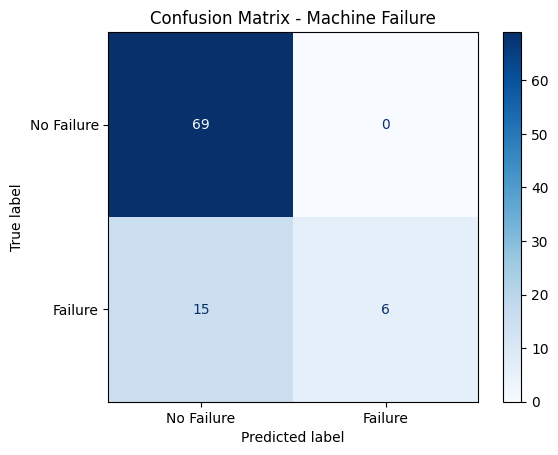

In [4]:
# Variable to hold the predictions for the model based on x_test
y_pred = naive_clf.predict(x_test)

# Generate the report
report = classification_report(y_test, y_pred)
print("Note that 0 = no failure, and 1 = failure).\n")
print(report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

labels = ["No Failure", "Failure"]
# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Machine Failure')
plt.show()

## KDS Performance Visualizations 
KDS package provides us with four plots: lift, decile-wise lift, cumulative gain, and  
and KS statistic. 


Generating KDS performance plots...
LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of event

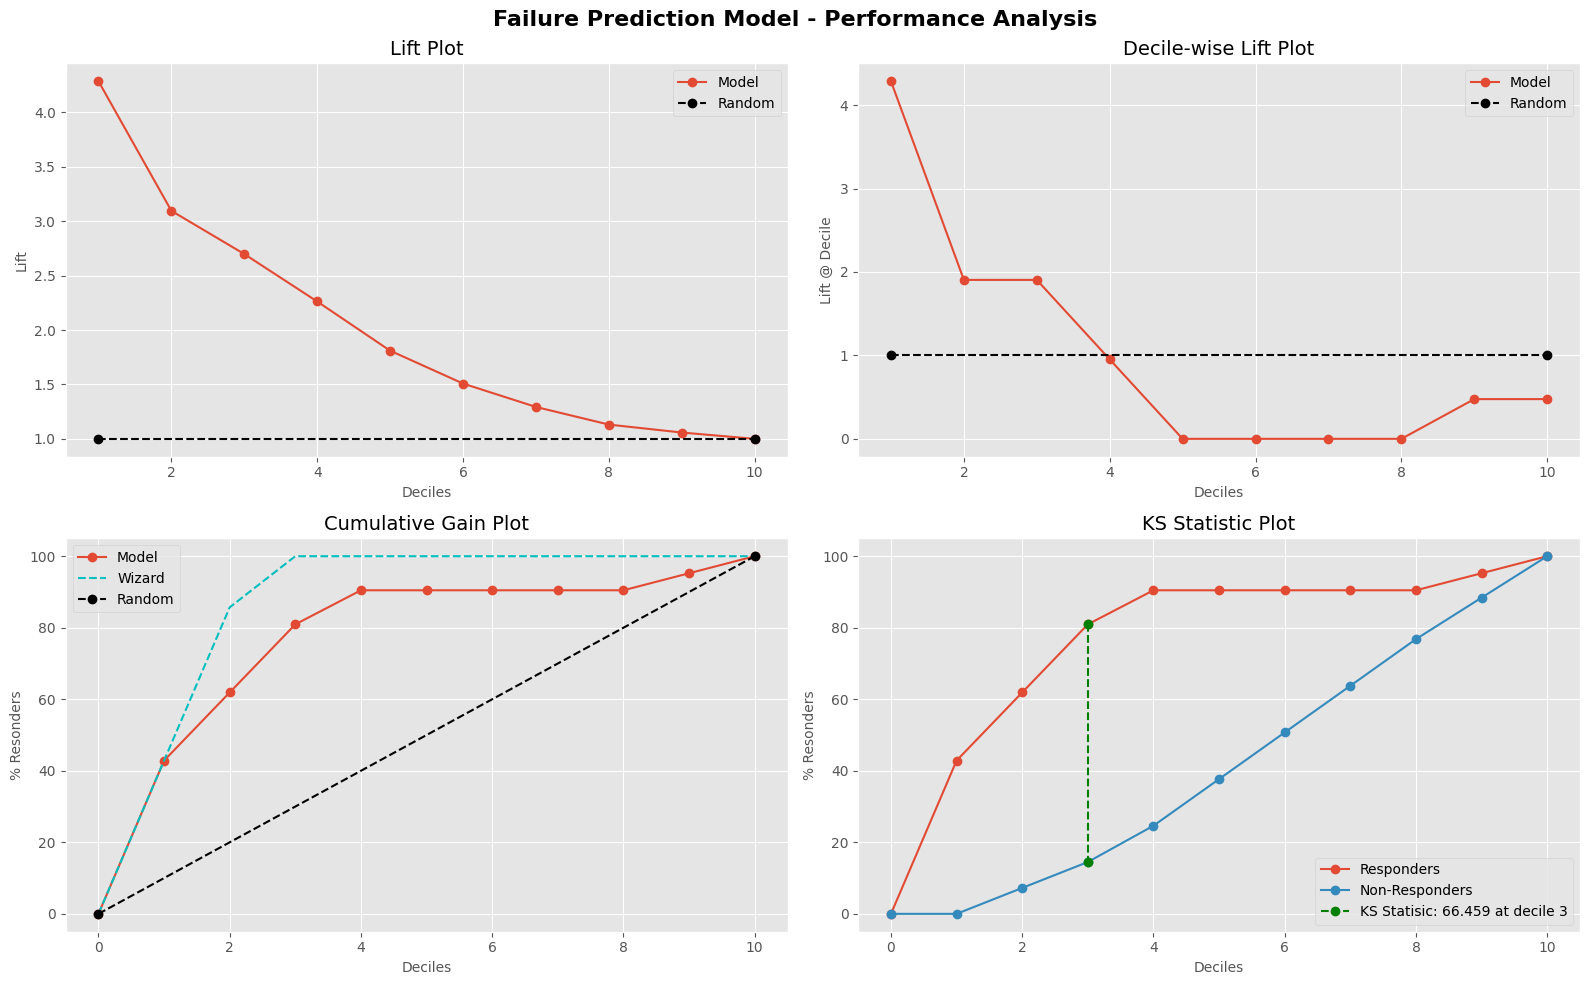

In [5]:
print("\nGenerating KDS performance plots...")

# 
y_pred_proba = naive_clf.predict_proba(x_test)[:, 1] 

# Set global plot style to use ggplot 
plt.style.use('ggplot')

# Generate all 4 plots at once using kds.metrics.report
fig = kds.metrics.report(
    y_true=y_test,
    y_prob=y_pred_proba,
)
plt.suptitle('Failure Prediction Model - Performance Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Conclusion and analysis 

***After evaluation of the naive Bayes algorithm related to machine failure, it  
performed moderately well, but compared to the KNN approach, it should NOT be used  
to predict failure.***

## Classification and Confusion Matrix Observations

- Overall accuracy of 83% (moderate; support 90)
- 21 (failed)/90 (no fail) = ~ 0.23 --> about 23% of machines failed. 

***No machine failure class*** 

Moderate precision -- 82% of predictions made were correct.  
High recall -- did not miss any non failing machines (FP).  
Moderate f1-score (0.90) -- average of the precision and recall 

***Machine failure class*** 

High precision -- 100% of predictions made were correct.  
Low recall -- 71% of failed machines were not identified (FN).  
Low f-1 score (0.44) -- harmonic mean.

## Performance Analysis of Plots

These plots have the decile (dataset divided into 10 equal part ranked from highest to  
lowest) on the x-axis, and the associated metric measured for each plot on the y-axis. 

**Lift**

This plot shows how well the model performed compared to random guessing in a cumulative  
average of the decile you are looking at. For example, the first decile (top 10% of machine failures  
predicted probabilities) showed a lift of ~ 4.3 - which means in this 10% of predicted  
failures, the model predicts ~4.3x better than guessing. This plot could be used to classify  
the machine failures into different maintenance needed categories based on their lift score  
such and high/med/low.

**Cumulative Gains** 

This measures the amount of positives discovered in each decile. The linear black line  
is how efficient your model is, the red line is the model we made via naive Bayes,  
and the blue line (wizard) is an estimate of how well the model would perform if it  
had 100% accuracy. The metrics are good capturing ~ 60% of the failures in the top 20%.  
This also shows theoretical return of investment (in our case machine failure and  
financial savings related to cost of replacement, etc.). This would also be a good indicator  
of how to prioritize maintenance schedules. 

**Decile-Wise Lift**

In this plot each individual decile is evaluated and is not an accumulation of previous  
deciles. This gives us more information to how the model is performing within that  
specific decile. In our plot we can see that it does well at recognizing failed machines  
in the first decile, moderate in ~2-3, but after that is no better than guessing. This  
means that unless we are using this model for only the top 10-ish highest percent of failing  
machines, the model performs poorly. 

**KS Statistic Plot**

This metrics measures the separation between the two failure/no failure classes. With a  
KS statistic of ~66.5 it shows good separation for out model at decile 3. This confirms  
our metrics above when we noted that up to about this decile, we have good results, but  
past this it starts to diminish. 

***Final Thoughts***

It was very interesting how different models behaved on the same data and some are considerably  
better at predictions. As we noted from the KNIME analysis, removing the model numbers  
did not influence the results of naive Bayes, but normalizing did (which I did not get  
a chance to do in this project). An observation that caught my eye is we did not use  
a stratified approach in data splitting for this model. With a lower number of failures  
in this dataset, we would probably benefit from this approach, and would probably want  
to use the k-folds or other cross validation as well. Overall, it is amazing how much  
computation goes into building and optimizing a model, and how extensive these tools are --
it's intimidating! 



